<div>
<img src="https://ymeglobal.org/wp-content/uploads/2019/02/YME-LOGO-2017.png" width="300px" align = "left"/>
</div>

# YME: Data Science with Machine Learning Workshop
## Exploratory Data Analysis and Prediction with Machine Learning

### Case Study: Titanic Survival Analysis and Prediction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

##### In this notebook, we will complete the analysis of what sorts of people were likely to survive. In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.

#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [Pandas](http://pandas.pydata.org/)
* [Matplotlib](http://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/index.html)
* [SciKit-Learn](http://scikit-learn.org/stable/)

---
#### Author: Ken Yew Piong

<i class="fa fa-linkedin-square fa-1x" aria-hidden="true"></i> Linkedin: [**@Ken Yew Piong**](https://www.linkedin.com/in/ken-yew-piong/)

<i class="fa fa-github-square fa-1x" aria-hidden="true"></i> GitHub: [**@KenYew**](https://github.com/KenYew)

<i class="fa fa-facebook-square fa-1x" aria-hidden="true"></i> Messenger: [**@kkenyew**](https://m.me/kkenyew)

<i class="fa fa-envelope-square" aria-hidden="true"></i> Mail: josephpiong@live.com


---
# Table of Contents

* **Intro:** Data Science and Machine Learning Project Workflow
* **Chapter 1:** Quick Overview of the Data
* **Chapter 2:** Data Wrangling and Analysis with Pandas and Seaborn
* **Chapter 3:** Data Visualisation with Matplotlib
* **Chapter 4:** Feature Engineering with Pandas
* **Chapter 5:** Machine Learning with Scikit-Learn


---
# Data Science and Machine Learning Project Workflow

<!-- 
<div>
<img src="https://image.slidesharecdn.com/applieddatasciencecourse21-181003133730/95/applied-data-science-course-part-2-the-data-science-workflow-and-basic-models-deep-dive-5-1024.jpg?cb=1538573971" width="700px" align = "middle"/>
</div> -->

<div>
<img src="https://image.slidesharecdn.com/datanativespres-161031143514/95/machine-learning-and-internet-of-things-the-future-of-medical-prevention-4-1024.jpg?cb=1477924745" width="800px" align = "middle"/>
</div>

## Step 1: Understanding the Problem and Business Objectives 
> - Define the objective in business terms
> - How should you frame this problem? (using Supervised/Unsupervised machine learning, online/offline, etc.)

## Step 2: Data Acquisition 
> - List the data you need and how much you need
> - Find and document where you can get that data
> - Get the data and convert the data to a format you can easily manipulate. 
> - Sample a test dataset and put it aside! Never look at it until machine learning!

## Step 3: Data Wrangling and Analysis 
> - Study each attribute and its characteristics (e.g.: Classes (categorical), age (continuous))
> - Identify extra data that would be useful
    
## Step 4: Data Visualization 
> - Visualise the data and study correlations between attributes

## Step 5: Data Cleaning
> - Fix or remove outliers
> - Fill in missing values (e.g.: with zero, mean, median) or drop their rows (or columns)

## Step 6: Feature Engineering 
> - Discretize continuous features
> - Decompose features (e.g.: categorical, date/time, etc.)
> - Add promising transformations of features (e.g.: log(x), sqrt(x), x^2, etc.)
> - Aggregate features into promising new features
> - Standardize or normalize features

## Step 7: Model training, experimentation and evaluation 
> - Train many quick and dirty models from different categories (e.g.: linear, logistic, SVM, Random Forests, etc.) using standard parameters
> - Measure and compare their accuracy performance
> - Short-list the top three to five most promising models
> - Fine-tune the hyperparameters using cross-validation
> - Try different approaches such as ensemble methods and deep learning if needed
> - Measure and compare accuracy performances on test dataset

## Step 8: Present the Solution and Launch the Product 
> - Document what you have done
> - Create a nice presentation highlighting the big picture first before going into how your solution achieves the business objectives
> - Ensure key findings are communicated through beautiful visualizations and memorable statements
> - Launch your product!

---
## Import Libraries

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

---
# Chapter 1: Quick Overview of the Data
## 1.1 Data Acquisition

```tex
Let's start by reading our data using Pandas! 
Please ensure that the folder dataset is in the same directory as this Jupyter notebook file.
```

#### __Dataset Import__

In [3]:
df = pd.read_csv('./dataset/train.csv')

---
# The Pandas Library
<div>
<img src="images/pandas_logo.png" width="500px" align = "left"/>
</div>

Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is fully compatible with the NumPy package.

Instead of axis Pandas uses "index" and "column" to describe the dimensions

<!-- <div>
<img src="images/pandas_basic.png" width="500px" align = "left"/>
</div> -->


## 1.2 Data Overview
### __Step 1: Quick Glance of the DataFrame__
```python
The pd.head() method allows us to observe the first 5 rows of the data from the dataframe.
```

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

```python
The pd.tail() method allows us to observe the last 5 rows of the data from the dataframe.
```

In [5]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

```python
Or simply print the whole dataframe to see everything.
```

In [6]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### Quick reference of feature abbreviations
|Feature|Definition|Key|
|:--------- |:----------------|:------------- |
|**survival**|Survival|0 = No, 1 = Yes|
|**pclass**|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|**sex**|Sex|
|**Age**|Age in years|
|**sibsp**|# of siblings / spouses aboard the Titanic|
|**parch**|# of parents / children aboard the Titanic|
|**ticket**|Ticket number|
|**fare**|Passenger fare|
|**cabin**|Cabin number|
|**embarked**|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

#### __Indexing and Selecting Data__

In [7]:
df['Fare']
# df['Fare'].head(5)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [8]:
df.loc[0]['Fare']

7.25

In [9]:
df.iloc[0, 9]

7.25

---
### __Step 2: Analyse the features of the dataset__

In [10]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

```tex
We see that the features that describe each passenger are separated into 4 types of data: 
1. Categorical: Survived, Sex, and Embarked
2. Ordinal (rank): Pclass (Passenger Class)
3. Continuous: Age, Fare
4. Discrete: SibSp, Parch
```

---
### __Step 3: Dataset Statistics__

#### __1. Use pd.info() for data overview__

```python
The pd.info() method is an extremely useful method that allows to have a quick overview of all the data types and the number of entries for each feature.
```

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
#### __2. Use pd.describe() for data statistics__

```python
The pd.desribe() method provides a quick statistical overview of the data with helpful stats such as mean, standard deviation, etc. of each feature.
```


In [12]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

```python
However, pd.describe() by default provides us a statistical overview of continuous data only but ignores categorical and ordinal data. You will need to include an additional parameter: pd.describe(include=['all']) to include all feature types.
```

In [13]:
df.describe(include='all')

PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                                 Name   Sex         Age  \
count                                             891   891  714.000000   
unique                                            891     2         NaN   
top     Bradley, Mr. George ("George Arthur Brayton")  male         NaN   
freq                                                1   577         NaN   
mean                                              NaN   NaN   29.699118   
std                                               NaN   NaN   14.526497   
min                                               NaN   NaN    0.420000   
25%                                               NaN   NaN   20.125000   
50%                                               NaN   NaN   28.000000   
75%                                               NaN   NaN   38.000000   
max                                               NaN   NaN   80.000000   

             SibSp       Parch Ticket        Fare Cabin Embarked  
count   891.000000  891.000000    891  891.000000   204      889  
unique         NaN         NaN    681         NaN   147        3  
top            NaN         NaN   1601         NaN    G6        S  
freq           NaN         NaN      7         NaN     4      644  
mean      0.523008    0.381594    NaN   32.204208   NaN      NaN  
std       1.102743    0.806057    NaN   49.693429   NaN      NaN  
min       0.000000    0.000000    NaN    0.000000   NaN      NaN  
25%       0.000000    0.000000    NaN    7.910400   NaN      NaN  
50%       0.000000    0.000000    NaN   14.454200   NaN      NaN  
75%       1.000000    0.000000    NaN   31.000000   NaN      NaN  
max       8.000000    6.000000    NaN  512.329200   NaN      NaN

---
### Let's take a look now with our recent findings!

Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

---
## 1.3 Data Cleaning

#### Take care of missing values!
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

To do that we'll use this line of code to drop the features entirely:

```python
    df = df.drop(['ticket','cabin'], axis=1) 
```

While this line of code removes the `NaN` values from every remaining column / feature:
```python
    df = df.dropna()
``` 
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.



In [14]:
df = df.drop(['Ticket','Cabin'], axis=1) # Remove columns 'Ticket' and 'Cabin'

In [15]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch     Fare Embarked  
0        0   7.2500        S  
1        0  71.2833        C  
2        0   7.9250        S  
3        0  53.1000        S  
4        0   8.0500        S  
..     ...      ...      ...  
886      0  13.0000        S  
887      0  30.0000        S  
888      2  23.4500        S  
889      0  30.0000        C  
890      0   7.7500        Q  

[891 rows x 10 columns]

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [17]:
df = df.dropna() # Remove NaN values

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

---
# Chapter 2: Data Wrangling and Analysis with Pandas and Seaborn
## 2.1 Exploratory Data Analysis

#### Number of Survivors

In [19]:
pd.value_counts(df['Survived'])

0    424
1    288
Name: Survived, dtype: int64

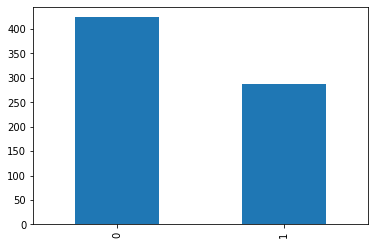

In [20]:
df['Survived'].value_counts().plot(kind='bar')

#### Fare Distribution

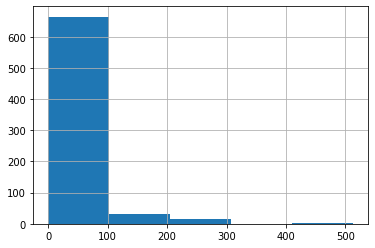

In [21]:
df['Fare'].hist(bins = 5)

#### Gender of Survivors

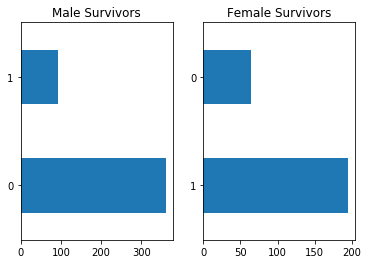

In [22]:
# Women and children first?
fig, axes = plt.subplots(1,2)
df[df['Sex'] == 'male'].Survived.value_counts().plot(kind='barh', ax = axes[0], title = 'Male Survivors')
df[df['Sex'] == 'female'].Survived.value_counts().plot(kind='barh', ax = axes[1], title = 'Female Survivors')

#### Age of Survivors

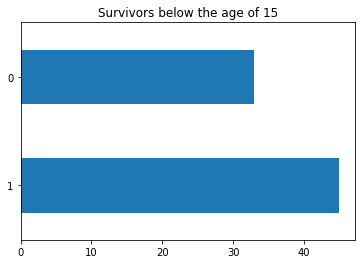

In [23]:
df[df['Age'] < 15].Survived.value_counts().plot(kind = 'barh', title = 'Survivors below the age of 15')

In [24]:
df['Survived'].mean()

0.4044943820224719

#### Grouping Data

In [25]:
df.groupby(['Sex']).mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   440.154440  0.752896  2.073359  27.745174  0.644788  0.714286   
male     453.412804  0.205298  2.335541  30.726645  0.439294  0.271523   

             Fare  
Sex                
female  47.332433  
male    27.268836

In [26]:
df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        479.060241  0.963855  34.240964  0.554217  0.506024   
       2        442.905405  0.918919  28.722973  0.500000  0.621622   
       3        406.500000  0.460784  21.750000  0.823529  0.950980   
male   1        451.910891  0.396040  41.281386  0.376238  0.336634   
       2        450.333333  0.151515  30.740707  0.373737  0.242424   
       3        455.217391  0.150198  26.507589  0.490119  0.256917   

                     Fare  
Sex    Pclass              
female 1       108.619680  
       2        21.951070  
       3        15.875369  
male   1        71.142781  
       2        21.113131  
       3        12.162695

In [27]:
df[df['Age'] < 18].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

---
# The Seaborn Library
<div>
<img src="https://seabornnetworks.com/wp-content/uploads/2017/05/seaborn.jpg" width="400px" align = "left"/>
</div>

The Python visualization library Seaborn provides a high-level interface for drawing attractive statistical graphics. It is built on top of matplotlib and closely integrated with pandas data structures. Here is some of the functionality that seaborn offers:

- Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
- Convenient views onto the overall structure of complex datasets
- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
- Concise control over matplotlib figure styling with several built-in themes
- Tools for choosing color palettes that faithfully reveal patterns in your data



##  2.2 Univariate Data Analysis
#### __Plotting count plots and distribution plots__

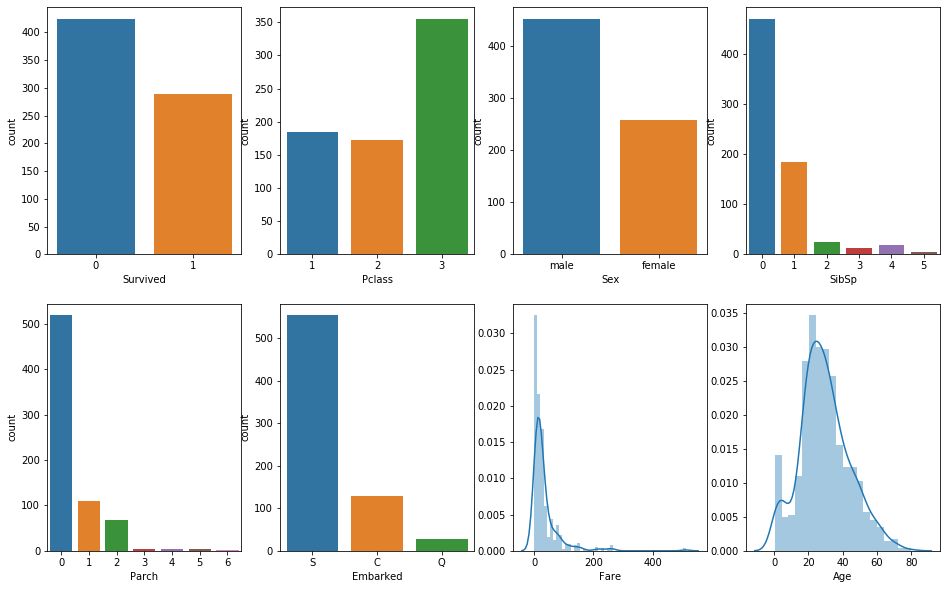

In [28]:
fig, ax = plt.subplots(2, 4, figsize = (16, 10))
sns.countplot('Survived', data = df, ax = ax[0,0])
sns.countplot('Pclass', data = df, ax = ax[0,1])
sns.countplot('Sex', data = df, ax = ax[0,2])
sns.countplot('SibSp', data = df, ax = ax[0,3])
sns.countplot('Parch', data = df, ax = ax[1,0])
sns.countplot('Embarked', data = df, ax = ax[1,1])
sns.distplot(df['Fare'], kde = True, ax = ax[1,2])
sns.distplot(df['Age'], kde = True, ax = ax[1,3])

---
## 2.3 Multivariate Data Analysis
#### __Plotting the correlation matrix heatmap__
```tex
A correlation matrix heatmap allows us to have an overview of the correlations between each features and provide us a 'bird's eye' view of how each data column relates to another.
```

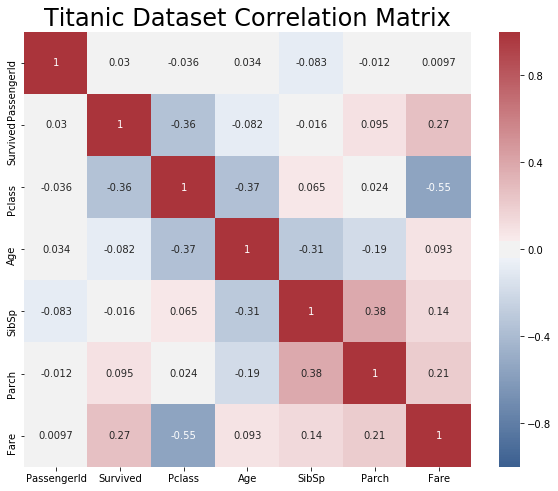

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Titanic Dataset Correlation Matrix', fontsize = 24)

# Compute pairwise correlation of columns
corr = df.corr()

# Colormap - maps data values to color space (where the colors denote correlation values)
cmap = sns.diverging_palette(250, 10, s = 68, l = 40, as_cmap = True)

# Plot correlation matrix to a heatmap with a custom colormap 
sns.heatmap(corr, cmap = cmap, vmin = -1, vmax = 1, annot = True)

---
## The Matplotlib Library
<div>
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="500px" align = "left"/>
</div>

Matplotlib is a visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays. 

One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib consists of several plots like line, bar, scatter, histogram etc.

Pyplot is a Matplotlib module which provides a MATLAB-like interface, with the advantage of being free and open-source. 

# Chapter 3: Data Visualisation with Matplotlib

In [30]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

### Exploratory Visualization:

The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price

Let’s see if we can gain a better understanding of who survived and died. 


First let’s plot a bar graph of those who Survived Vs. Those who did not.


Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

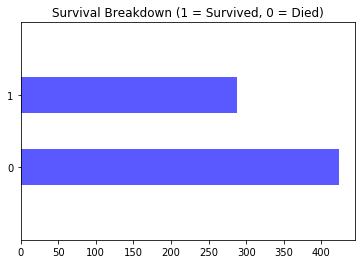

In [31]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Now let’s tease more structure out of the data,
### Let’s break the previous graph down by gender


(-1, 2)

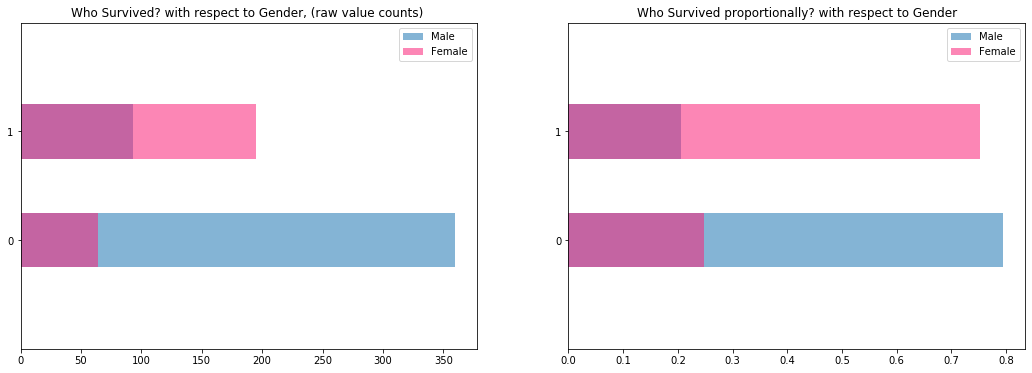

In [32]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

Here it’s clear that although more men died and survived in raw value counts, females had a greater survival rate proportionally (~25%), than men (~20%)

#### Great! But let’s go down even further:
Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.


In [33]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with. Below is the progression of process laid out together:

In [34]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

--- 
# Chapter 4: Feature Engineering with Pandas
> - Discretize continuous features
> - Decompose features (e.g.: categorical, date/time, etc.)
> - Add promising transformations of features (e.g.: log(x), sqrt(x), x^2, etc.)
> - Aggregate features into promising new features
> - Standardize or normalize features

### Step 1: Dataset Import and Cleaning

In [35]:
train_df = df.copy() # Copy the df we have explored into train_df
test_df = pd.read_csv('./dataset/test.csv') # Importing the testing dataset
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1) # Dropping unimportant features
test_df = test_df.dropna() # Removing NaN noisy data
combine = [train_df, test_df] # Storing both datasets as a list for 'For' loop computations

---
### Step 2: Convert categorical features into discrete values (binary/m-nary) 
#### __(A) Sex feature__ ('Male': 0, 'Female': 1)
```tex
We will convert the sex categories, 'Male' and 'Female', with binary values. 
We perform the following mapping using one-hot encoding - Male: 0, Female: 1
```

In [36]:
for dataset in combine: 
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

      Fare Embarked  
0   7.2500        S  
1  71.2833        C  
2   7.9250        S  
3  53.1000        S  
4   8.0500        S

---
#### __(B) Embarked feature__ ('S': 0, 'C': 1, 'Q': 2)
```tex
We will convert the embarked categories, 'S', 'C' and 'Q', with m-nary values. 
We perform the following mapping using one-hot encoding - S: 0, C: 1, Q: 2
```


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

      Fare  Embarked  
0   7.2500         0  
1  71.2833         1  
2   7.9250         0  
3  53.1000         0  
4   8.0500         0

---
### Step 3: Aggregate features into new promising features
#### __(A) FamilySize feature__ (combining SibSp and Parch features)
```tex
We can create a new feature called 'FamilySize' which denotes the number of family members by combining two features, 'Parch' and 'SibSp'. We can append a new feature column called 'FamilySize' after computation.
```

In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # to account for Python's zero-indexing

# Quick glance of our new feature
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.777778
2           3  0.569892
1           2  0.546763
6           7  0.333333
0           1  0.318408
4           5  0.272727
5           6  0.136364
7           8  0.000000

---
#### __(B) IsAlone feature__

In [39]:
for dataset in combine: 
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

IsAlone  Survived
0        0  0.516129
1        1  0.318408

In [40]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

      Fare  Embarked  FamilySize  IsAlone  
0   7.2500         0           2        0  
1  71.2833         1           2        0  
2   7.9250         0           1        1  
3  53.1000         0           2        0  
4   8.0500         0           1        1

---
### Step 4: Discretise continuous features
#### __(A) AgeBand feature__

In [41]:
train_df['AgeThresholds'] = pd.cut(train_df['Age'], 5) # Splice Age into 5 categories
train_df[['AgeThresholds', 'Survived']].groupby(['AgeThresholds'], as_index=False).mean().sort_values(by='AgeThresholds', ascending=True)

AgeThresholds  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.369942
2  (32.252, 48.168]  0.401070
3  (48.168, 64.084]  0.426471
4    (64.084, 80.0]  0.090909

```tex
We can replace the continuous variable 'Age' with ordinals based on the computed 'AgeBand' above.
```

In [42]:
for dataset in combine:    
    # Create a new column called 'AgeBand'
    dataset['AgeBand'] = dataset['Age'].copy()
    
    # Overwrite the values based on the AgeThresholds computed
    dataset.loc[ dataset['AgeBand'] <= 16, 'AgeBand'] = 0
    dataset.loc[(dataset['AgeBand'] > 16) & (dataset['AgeBand'] <= 32), 'AgeBand'] = 1
    dataset.loc[(dataset['AgeBand'] > 32) & (dataset['AgeBand'] <= 48), 'AgeBand'] = 2
    dataset.loc[(dataset['AgeBand'] > 48) & (dataset['AgeBand'] <= 64), 'AgeBand'] = 3
    dataset.loc[ dataset['AgeBand'] > 64, 'AgeBand']
    
    # Converting 'Age' and 'AgeBand' features into integers
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['AgeBand'] = dataset['AgeBand'].astype(int)
    
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

      Fare  Embarked  FamilySize  IsAlone     AgeThresholds  AgeBand  
0   7.2500         0           2        0  (16.336, 32.252]        1  
1  71.2833         1           2        0  (32.252, 48.168]        2  
2   7.9250         0           1        1  (16.336, 32.252]        1  
3  53.1000         0           2        0  (32.252, 48.168]        2  
4   8.0500         0           1        1  (32.252, 48.168]        2

---
#### __(B) FareBand feature__
```tex
We may also want to round off the fare to two decimal places as it represents currency and then calculate the threshold of 'FareBand' for categorization.
```

In [43]:
# test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareThresholds'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareThresholds', 'Survived']].groupby(['FareThresholds'], as_index=False).mean().sort_values(by='FareThresholds', ascending=True)

FareThresholds  Survived
0   (-0.001, 8.05]  0.204188
1   (8.05, 15.646]  0.321212
2   (15.646, 33.0]  0.486034
3  (33.0, 512.329]  0.615819

```tex
Convert the 'Fare' feature to ordinal values based on the 'FareBand'.
```

In [44]:
for dataset in combine:
    # Create a new column called 'FareBand'
    dataset['FareBand'] = dataset['Fare'].copy()
    
    # Overwrite the values based on the FareThresholds computed
    dataset.loc[ dataset['FareBand'] <= 8.05, 'FareBand'] = 0
    dataset.loc[(dataset['FareBand'] > 8.05) & (dataset['FareBand'] <= 15.646), 'FareBand'] = 1
    dataset.loc[(dataset['FareBand'] > 15.646) & (dataset['FareBand'] <= 33.0), 'FareBand']   = 2
    dataset.loc[ dataset['FareBand'] > 33.0, 'FareBand'] = 3
    
    # Converting 'Fare' and 'FareBand' features into integers
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['FareBand'] = dataset['FareBand'].astype(int)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

   Fare  Embarked  FamilySize  IsAlone     AgeThresholds  AgeBand  \
0     7         0           2        0  (16.336, 32.252]        1   
1    71         1           2        0  (32.252, 48.168]        2   
2     7         0           1        1  (16.336, 32.252]        1   
3    53         0           2        0  (32.252, 48.168]        2   
4     8         0           1        1  (32.252, 48.168]        2   

    FareThresholds  FareBand  
0   (-0.001, 8.05]         0  
1  (33.0, 512.329]         3  
2   (-0.001, 8.05]         0  
3  (33.0, 512.329]         3  
4   (-0.001, 8.05]         0

---
### Step 4: Feature Selection
```tex
We can now proceed to drop features that provide no further useful information for the task. 
We can now remove the 'AgeThresholds' and 'FareThresholds' columns, as they are only needed to determine the threshold values for different ordinal types for Age and Fare. The 'Name' and 'PassengerId' columns can also be dropped to simplify the datasets. 
```

In [45]:
train_df = train_df.drop(['AgeThresholds'], axis=1)
train_df = train_df.drop(['FareThresholds'], axis=1)
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
combine = [train_df, test_df]

---
### Step 5: Overview of Pre-processed Datasets

In [46]:
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  \
0         0       3    0   22      1      0     7         0           2   
1         1       1    1   38      1      0    71         1           2   
2         1       3    1   26      0      0     7         0           1   
3         1       1    1   35      1      0    53         0           2   
4         0       3    0   35      0      0     8         0           1   

   IsAlone  AgeBand  FareBand  
0        0        1         0  
1        0        2         3  
2        1        1         0  
3        0        2         3  
4        1        2         0

In [47]:
test_df.head()

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  IsAlone  \
0       3    0   34      0      0     7         2           1        1   
1       3    1   47      1      0     7         0           2        0   
2       2    0   62      0      0     9         2           1        1   
3       3    0   27      0      0     8         0           1        1   
4       3    1   22      1      1    12         0           3        0   

   AgeBand  FareBand  
0        2         0  
1        2         0  
2        3         1  
3        1         1  
4        1         1

### Quick reference of feature abbreviations
|Feature|Definition|Key|
|:--------- |:----------------|:------------- |
|**survival**|Survival|0 = No, 1 = Yes|
|**pclass**|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|**sex**|Sex|
|**Age**|Age in years|
|**sibsp**|# of siblings / spouses aboard the Titanic|
|**parch**|# of parents / children aboard the Titanic|
|**ticket**|Ticket number|
|**fare**|Passenger fare|
|**cabin**|Cabin number|
|**embarked**|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

---
# Chapter 5: Machine Learning with Scikit-Learn

#### Model, predict and solve
In this chapter, we will be experimenting with various supervised learning models and evaluate their performances in the end. 
For this problem, our choices of machine learning models are: 

- Logistic Regression
- k-Nearest Neighbors (k-NN)
- Support Vector Machines
- Naive Bayes Classifier
- Decision Tree
- Random Forest
- Adaptive Boosting Ensemble Method (AdaBoost)

--- 
## Step 1: Preparing our training and testing datasets

<div>
<img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_2906/datasets/dtree_test_set.png" width="400px" align = "middle"/>
</div>


In [48]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.copy()
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712,), (331, 11))

In [49]:
X_train

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  IsAlone  \
0         3    0   22      1      0     7         0           2        0   
1         1    1   38      1      0    71         1           2        0   
2         3    1   26      0      0     7         0           1        1   
3         1    1   35      1      0    53         0           2        0   
4         3    0   35      0      0     8         0           1        1   
..      ...  ...  ...    ...    ...   ...       ...         ...      ...   
885       3    1   39      0      5    29         2           6        0   
886       2    0   27      0      0    13         0           1        1   
887       1    1   19      0      0    30         0           1        1   
889       1    0   26      0      0    30         1           1        1   
890       3    0   32      0      0     7         2           1        1   

     AgeBand  FareBand  
0          1         0  
1          2         3  
2          1         0  
3          2         3  
4          2         0  
..       ...       ...  
885        2         2  
886        1         1  
887        1         2  
889        1         2  
890        1         0  

[712 rows x 11 columns]

In [50]:
X_test

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  IsAlone  \
0         3    0   34      0      0     7         2           1        1   
1         3    1   47      1      0     7         0           2        0   
2         2    0   62      0      0     9         2           1        1   
3         3    0   27      0      0     8         0           1        1   
4         3    1   22      1      1    12         0           3        0   
..      ...  ...  ...    ...    ...   ...       ...         ...      ...   
409       3    1    3      1      1    13         0           3        0   
411       1    1   37      1      0    90         2           2        0   
412       3    1   28      0      0     7         0           1        1   
414       1    1   39      0      0   108         1           1        1   
415       3    0   38      0      0     7         0           1        1   

     AgeBand  FareBand  
0          2         0  
1          2         0  
2          3         1  
3          1         1  
4          1         1  
..       ...       ...  
409        0         1  
411        2         3  
412        1         0  
414        2         3  
415        2         0  

[331 rows x 11 columns]

---
## Step 2: Train various machine learning models
```tex
We will be training various machine learning models and determine which machine learning algorithm yields the highest training and testing score accuracies. Training score accuracy is tells us how accurate the model is able to correctly predict the outcome based on learning from the traning dataset and likewise for the testing score accuracy. 
```

### (A) Logistic Regression

In [51]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, y_train) * 100, 2)
print('Training Accuracy Score: '+ str(acc_logreg) + '%')

Training Accuracy Score: 80.06%


#### __Append our results__

In [52]:
results_df = X_test.copy()
results_df['logreg'] = np.array(y_pred)

---
### (B) Support Vector Machines

In [53]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
results_df['svc'] = np.array(y_pred)
print('Training Accuracy Score: '+ str(acc_svc) + '%')

Training Accuracy Score: 67.84%


---
### (C) k-Nearest Neighbours

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
results_df['knn'] = np.array(y_pred)
print('Training Accuracy Score: '+ str(acc_knn) + '%')

Training Accuracy Score: 82.3%


---
### (D) Naive Bayes Classifier

In [55]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
results_df['gnb'] = np.array(y_pred)
print('Training Accuracy Score: '+ str(acc_gnb) + '%')

Training Accuracy Score: 77.11%


---
### (E) Decision Trees

In [56]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train, y_train) * 100, 2)
results_df['dtc'] = np.array(y_pred)
print('Training Accuracy Score: '+ str(acc_dtc) + '%')

Training Accuracy Score: 97.19%


---
### (F) Random Forest

In [57]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, y_train) * 100, 2)
results_df['rfc'] = np.array(y_pred)
print('Training Accuracy Score: '+ str(acc_rfc) + '%')

Training Accuracy Score: 97.05%


---
### (G) AdaBoost

In [58]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc_abc = round(abc.score(X_train, y_train) * 100, 2)
results_df['abc'] = np.array(y_pred)
print('Training Accuracy Score: '+ str(acc_abc) + '%')

Training Accuracy Score: 82.44%


---
## Step 3: Model evaluation

In [59]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'k-Nearest Neighbors', 'Naive Bayes', 'Decision Trees', 'Random Forest', 'AdaBoost'],
    'Score': [acc_logreg, acc_svc, acc_knn, acc_gnb, acc_dtc, acc_rfc, acc_abc]})
models.sort_values(by='Score', ascending=False)

Model  Score
4           Decision Trees  97.19
5            Random Forest  97.05
6                 AdaBoost  82.44
2      k-Nearest Neighbors  82.30
0      Logistic Regression  80.06
3              Naive Bayes  77.11
1  Support Vector Machines  67.84

---
### Resultant Dataframe with Machine Learning Results

In [60]:
results_df

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  IsAlone  \
0         3    0   34      0      0     7         2           1        1   
1         3    1   47      1      0     7         0           2        0   
2         2    0   62      0      0     9         2           1        1   
3         3    0   27      0      0     8         0           1        1   
4         3    1   22      1      1    12         0           3        0   
..      ...  ...  ...    ...    ...   ...       ...         ...      ...   
409       3    1    3      1      1    13         0           3        0   
411       1    1   37      1      0    90         2           2        0   
412       3    1   28      0      0     7         0           1        1   
414       1    1   39      0      0   108         1           1        1   
415       3    0   38      0      0     7         0           1        1   

     AgeBand  FareBand  logreg  svc  knn  gnb  dtc  rfc  abc  
0          2         0       0    0    0    0    0    0    0  
1          2         0       0    0    0    1    0    0    1  
2          3         1       0    0    1    0    1    0    0  
3          1         1       0    0    0    0    1    1    0  
4          1         1       1    0    0    1    0    0    1  
..       ...       ...     ...  ...  ...  ...  ...  ...  ...  
409        0         1       1    0    1    1    1    1    1  
411        2         3       1    1    1    1    1    1    1  
412        1         0       1    0    0    0    0    0    1  
414        2         3       1    1    1    1    1    1    1  
415        2         0       0    0    0    0    0    0    0  

[331 rows x 18 columns]

---
## The next steps...
### Ways to boost model score
#### Hyper-parameter tuning
> 1. Use GridSearchCV or RandomSearchCV methods from Scikit-Learn
> 2. Apply a parameter grid containing possible hyperparameters to loop through
> 3. Determine the optimal set of hyperparameters for the model to yield the highest accuracy score. 
#### Cross-validation techniques
> 1. Split the dataset into k-number of folds
> 2. In each k-iteration, the k-th fold of the dataset is selected as the testing data while the rest of the dataset is used as the training data
> 3. This step is repeated going through all k-folds of the dataset as testing data
> 4. The iteration with the selected k fold that yields the highest accuracy score will be chosen as the default training and testing dataset split when training our machine learning model. 
#### Try a different machine learning or deep learning model
> - Depending on the nature of your dataset, you can always use different machine learning or deep learning algorithms that are more optimised for the problem. 
> - For example: Image recognition - Use Convolutional Neural Networks